# Exploring Putting Statistics

# Importing and Exploring Data

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [2]:
TourData = pd.read_csv('pgaTourData.csv') 

TourData = TourData.dropna(subset=['Average Putts'])
TourData = TourData.dropna(subset=['Average SG Putts'])
TourData["Points"].fillna(0)
TourData["Wins"].fillna(0)

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1673    1.0
1674    0.0
1675    0.0
1676    0.0
1677    0.0
Name: Wins, Length: 1678, dtype: float64

# Average Putts

Text(0.5, 0.98, 'Average Putts VS. Number of FedEx Cup Points')

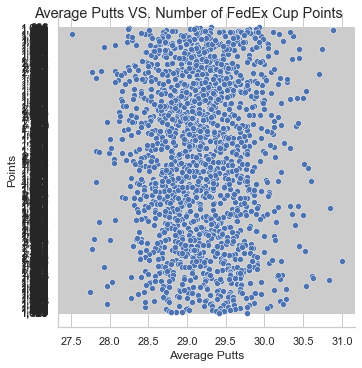

In [3]:
#Log Transformation
#TourData['Points'] = TourData['Points'].fillna(0)
#print(TourData["Points"])
#TourData['log(Points)'] = np.log(TourData['Points'] )



fig1 = sns.relplot(data= TourData, x="Average Putts", y="Points")
fig1.fig.suptitle('Average Putts VS. Number of FedEx Cup Points')

Text(0.5, 0.98, 'Average Putts VS. Wins')

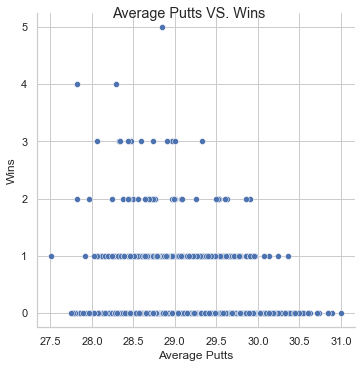

In [4]:
#Wins
TourData['Wins'] = TourData['Wins'].fillna(0)
fig1 = sns.relplot(data= TourData, x="Average Putts", y="Wins")
fig1.fig.suptitle('Average Putts VS. Wins')

In [5]:
#T-test for wins
from scipy import stats
from scipy.stats import t

TourData['HasWon'] = np.where(TourData['Wins'] > 0 , 'Yes', 'No')

winner = TourData[TourData["HasWon"] == "Yes"]["Average Putts"]
not_winner =  TourData[TourData["HasWon"] == "No"]["Average Putts"]
df = len(winner) + len(not_winner) - 2

t_test = stats.ttest_ind(winner,not_winner, equal_var = False)

real_t_score = t_test.statistic
real_pvalue = t_test.pvalue/2

print("t-score: ",real_t_score, 
     "P-value: ", real_pvalue)

t-score:  -6.2674215133248365 P-value:  4.591154977855984e-10


# Average Strokes Gained on Putting

Text(0.5, 0.98, 'Average Strokes Gained Putting VS. Number of FedEx Cup Points')

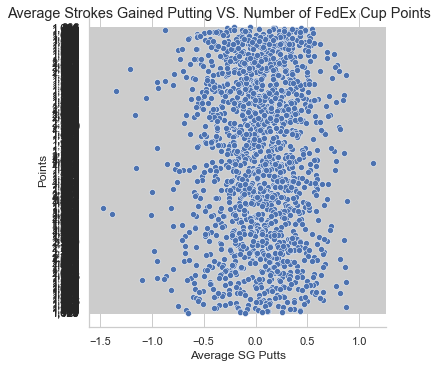

In [6]:
fig1 = sns.relplot(data= TourData, x="Average SG Putts", y="Points")
fig1.fig.suptitle('Average Strokes Gained Putting VS. Number of FedEx Cup Points')

Text(0.5, 0.98, 'Average Strokes Gained Putting VS. Wins')

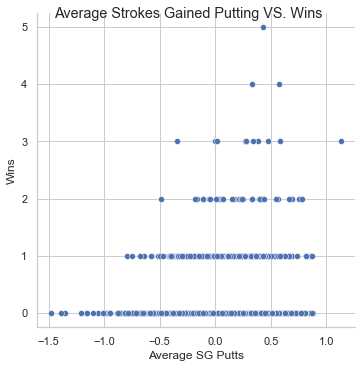

In [7]:
fig1 = sns.relplot(data= TourData, x="Average SG Putts", y="Wins")
fig1.fig.suptitle('Average Strokes Gained Putting VS. Wins')

In [8]:
#T-test for wins
#T-test for wins
from scipy import stats
from scipy.stats import t

TourData['HasWon'] = np.where(TourData['Wins'] > 0 , 'Yes', 'No')

SGwinner = TourData[TourData["HasWon"] == "Yes"]["Average SG Putts"]
SGnot_winner =  TourData[TourData["HasWon"] == "No"]["Average SG Putts"]
df = len(winner) + len(not_winner) - 2

t_test = stats.ttest_ind(SGwinner,SGnot_winner, equal_var = False)

real_t_score = t_test.statistic
real_pvalue = t_test.pvalue/2

print("t-score: ",real_t_score, 
     "P-value: ", real_pvalue)

t-score:  5.1874957592880975 P-value:  1.6735869064159675e-07
